In [ ]:
#this code in the current version is intended to run on colab
#mainly based based on https://github.com/Diyago/ML-DL-scripts/tree/master/DEEP%20LEARNING/segmentation/Segmentation%20pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAIN_AGAIN = False
SHORT_TRAINING = False

#Preparing Libraries and Folders

In [ ]:
cd /content/drive/MyDrive/gather/ML-DL-scripts/DEEP\ LEARNING/segmentation/Segmentation \pipeline


/content/drive/MyDrive/gather/ML-DL-scripts/DEEP LEARNING/segmentation/Segmentation pipeline


In [ ]:
!pip install 'h5py<3.0.0'

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
#!pip install tensorflow==1.15.0
%tensorflow_version 1.15

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
#!git clone https://github.com/zentariko/ML-DL-scripts.git

In [ ]:
!mkdir road_segmentation/training
!mkdir road_segmentation/training/input
!mkdir road_segmentation/training/output
!mkdir road_segmentation/testing
!mkdir road_segmentation/testing/input
!mkdir road_segmentation/testing/output

mkdir: cannot create directory ‘road_segmentation/training’: File exists
mkdir: cannot create directory ‘road_segmentation/training/input’: File exists
mkdir: cannot create directory ‘road_segmentation/training/output’: File exists
mkdir: cannot create directory ‘road_segmentation/testing’: File exists
mkdir: cannot create directory ‘road_segmentation/testing/input’: File exists
mkdir: cannot create directory ‘road_segmentation/testing/output’: File exists


In [ ]:
#first: create folders like /segmentation/road_segmentation/training/input
#download images
!python "get dataset.py"

skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


In [ ]:
#Unet libraries:
!pip install git+https://github.com/qubvel/efficientnet
!pip install git+https://github.com/qubvel/classification_models.git
!pip install git+https://github.com/qubvel/segmentation_models
!pip install -U git+https://github.com/albu/albumentations
!pip install tta-wrapper

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-t3t3q3gr
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-t3t3q3gr
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=bb422f35f73e3306669bc2f00d2988b3324f6650ad8cecd67a949f2b8822ca16
  Stored in directory: /tmp/pip-ephem-wheel-cache-964vu11d/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-8ifku2xu
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-8ifku2xu
  Running command git submodule update --init --recursive -q
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=537d72bce8b8aa43020e18a182d47950fff06ad1ec89c81d2d9321a42172d19c
  Stored in directory: /tmp/pip-ephem-wheel-cache-rpxkdx5z/wheels

In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence
#from keras.utils import Sequence
from skimage.io import imread
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf

## Defining data generator

In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)
%load_ext autoreload
%autoreload 2
%matplotlib inline
from albumentations import (Blur, Compose, HorizontalFlip, HueSaturationValue,
                            IAAEmboss, IAASharpen, JpegCompression, OneOf,
                            RandomBrightness, RandomBrightnessContrast,
                            RandomContrast, RandomCrop, RandomGamma,
                            RandomRotate90, RGBShift, ShiftScaleRotate,
                            Transpose, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion)
 
import albumentations as albu
from albumentations import Resize

class DataGeneratorFolder(Sequence):
    def __init__(self, root_dir=r'../data/val_test', image_folder='img/', mask_folder='masks/', 
                 batch_size=1, image_size=768, nb_y_features=1, 
                 augmentation=None,
                 suffle=True):
      
        self.root_dir = root_dir
        self.image_folder = image_folder
        self.mask_folder = mask_folder

        self.image_filenames = os.listdir(os.path.join(root_dir, image_folder))
        self.mask_names = os.listdir(os.path.join(root_dir, mask_folder))
        if SHORT_TRAINING:
          pass
          self.image_filenames = os.listdir(os.path.join(root_dir, image_folder))
          self.image_filenames = self.image_filenames[0:int(len(self.image_filenames)/6)]
          print(self.image_filenames)
          


          self.mask_names = os.listdir(os.path.join(root_dir, mask_folder))
          print(self.mask_names)
          self.mask_names = self.mask_names[0:,int(len(self.mask_names)/6)]
          print(self.mask_names)
          
        
        self.batch_size = batch_size
        self.currentIndex = 0
        self.augmentation = augmentation
        self.image_size = image_size
        self.nb_y_features = nb_y_features
        self.indexes = None
        self.suffle = suffle
        
    def __len__(self):
        """
        Calculates size of batch
        """
        return int(np.ceil(len(self.image_filenames) / (self.batch_size)))

    def on_epoch_end(self):
        """Updates indexes after each epoch"""
        if self.suffle==True:
            self.image_filenames, self.mask_names = shuffle(self.image_filenames, self.mask_names)
        
    def read_image_mask(self, image_name, mask_name):
        return (imread(self.root_dir + "/" + self.image_folder +  "/" +  image_name)/255).astype("float32"), (imread(
            self.root_dir + "/" + self.mask_folder + "/" + mask_name, as_gray=True) > 0).astype(np.int8)

    def __getitem__(self, index):
        """
        Generate one batch of data
        
        """
        # Generate indexes of the batch
        data_index_min = int(index*self.batch_size)
        data_index_max = int(min((index+1)*self.batch_size, len(self.image_filenames)))
        
        indexes = self.image_filenames[data_index_min:data_index_max]

        this_batch_size = len(indexes) # The last batch can be smaller than the others
        
        # Defining dataset
        X = np.empty((this_batch_size, self.image_size, self.image_size, 3), dtype=np.float32)
        y = np.empty((this_batch_size, self.image_size, self.image_size, self.nb_y_features), dtype=np.uint8)
       
        for i, sample_index in enumerate(indexes):
            
            X_sample, y_sample = self.read_image_mask(self.image_filenames[index * self.batch_size + i], 
                                                    self.mask_names[index * self.batch_size + i])
                 
            # if augmentation is defined, we assume its a train set
            if self.augmentation is not None:
                print("a")
                  
                # Augmentation code
                augmented = self.augmentation(self.image_size)(image=X_sample, mask=y_sample)
                image_augm = augmented['image']
                mask_augm = augmented['mask'].reshape(self.image_size, self.image_size, self.nb_y_features)
                X[i, ...] = np.clip(image_augm, a_min = 0, a_max=1)
                y[i, ...] = mask_augm
            
            # if augmentation isnt defined, we assume its a test set. 
            # Because test images can have different sizes we resize it to be divisable by 32
            elif self.augmentation is None and self.batch_size ==1:
                X_sample, y_sample = self.read_image_mask(self.image_filenames[index * 1 + i], 
                                                      self.mask_names[index * 1 + i])
                augmented = Resize(height=(X_sample.shape[0]//32)*32, width=(X_sample.shape[1]//32)*32)(image = X_sample, mask = y_sample)
                X_sample, y_sample = augmented['image'], augmented['mask']

                return X_sample.reshape(1, X_sample.shape[0], X_sample.shape[1], 3).astype(np.float32),\
                       y_sample.reshape(1, X_sample.shape[0], X_sample.shape[1], self.nb_y_features).astype(np.uint8)


        return X, y

## Data augmentation - albumentations

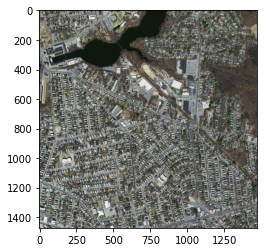

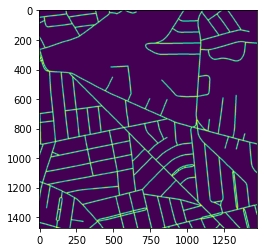

In [ ]:
def aug_with_crop(image_size = 256, crop_prob = 1):
    return Compose([
        RandomCrop(width = image_size, height = image_size, p=crop_prob),
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        RandomRotate90(p=0.5),
        Transpose(p=0.5),
        ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),
        RandomBrightnessContrast(p=0.5),
        RandomGamma(p=0.25),
        IAAEmboss(p=0.25),
        #Emboss(p=0.25),
        Blur(p=0.01, blur_limit = 3),
        OneOf([
            ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
            GridDistortion(p=0.5),
            OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
        ], p=0.8)
    ], p = 1)

test_generator = DataGeneratorFolder(root_dir = './road_segmentation/training',#'./data/road_segmentation_ideal/training',
                                     image_folder = 'input/', 
                                     mask_folder = 'output/',
                                     batch_size = 1,
                                     nb_y_features = 1, 
                                     #augmentation = aug_with_crop
                                     )
Xtest, ytest = test_generator.__getitem__(0)
plt.imshow(Xtest[0])     
plt.show()
plt.imshow(ytest[0, :,:,0])
plt.show() 

In [ ]:
# setting generators
test_generator = DataGeneratorFolder(root_dir = './road_segmentation/testing', #root_dir = './data/road_segmentation_ideal/training', 
                           image_folder = 'input/', 
                           mask_folder = 'output/', 
                                   batch_size=1,augmentation = aug_with_crop,
                                   nb_y_features = 1#, augmentation = True
                                   )


if SHORT_TRAINING:
  batch_size = 4 #maybe change
else:
  batch_size = 4

train_generator = DataGeneratorFolder(root_dir = './road_segmentation/training', 
                                      image_folder = 'input/', 
                                      mask_folder = 'output/', 
                                      augmentation = aug_with_crop,
                                      batch_size= batch_size,
                                      image_size=512,
                                      nb_y_features = 1#,
                                      #augmentation = True
                                      )

## Callbacks

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard

# reduces learning rate on plateau
lr_reducer = ReduceLROnPlateau(factor=0.1,
                               cooldown= 10,
                               patience=10,verbose =1,
                               min_lr=0.1e-5)
mode_autosave = ModelCheckpoint("./weights/road_crop.efficientnetb0imgsize.h5",monitor='val_iou_score', 
                                   mode = 'max', save_best_only=True, verbose=1, period =10)

# stop learining as metric on validatopn stop increasing
early_stopping = EarlyStopping(patience=10, verbose=1, mode = 'auto') 

# tensorboard for monitoring logs
tensorboard = TensorBoard(log_dir='./logs/tenboard', histogram_freq=0,
                          write_graph=True, write_images=False)

callbacks = [mode_autosave, lr_reducer, tensorboard, early_stopping]

Using TensorFlow backend.


In [ ]:
#from keras.models import load_model

In [ ]:
#load_model('path_to_my_model.h5')

In [ ]:
from segmentation_models import Unet
from keras.optimizers import Adam
from segmentation_models.losses import bce_jaccard_loss, bce_dice_loss
from segmentation_models.metrics import iou_score
from keras.models import load_model

def plot_training_history(history):
    """
    Plots model training history 
    """
    fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(15,5))
    ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
    ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax_loss.legend()
    ax_acc.plot(history.epoch, history.history["iou_score"], label="Train iou")
    ax_acc.plot(history.epoch, history.history["val_iou_score"], label="Validation iou")
    ax_acc.legend()
    
model = Unet(backbone_name = 'efficientnetb0', encoder_weights='imagenet', encoder_freeze = False)
model.compile(optimizer = Adam(),
                    loss=bce_jaccard_loss, metrics=[iou_score])
#TRAIN_AGAIN = True
if TRAIN_AGAIN:    
  history = model.fit_generator(train_generator, shuffle =True,
                    epochs=3, workers=30, use_multiprocessing=True,
                    validation_data = test_generator, 
                    verbose = 1, callbacks=callbacks)  
  plot_training_history(history)
  model.save("model_short.h5")
else:
  model = load_model('model_short.h5', compile=False)
  


Segmentation Models: using `keras` framework.
16809984/16804768 [==============================] - 0s 0us/step


## Inference and model quality  check

#### Single image

In [ ]:
def iou_metric(y_true_in, y_pred_in):
    labels = y_true_in
    y_pred = y_pred_in

    temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=([0,0.5,1], [0,0.5, 1]))

    intersection = temp1[0]

    area_true = np.histogram(labels,bins=[0,0.5,1])[0]
    area_pred = np.histogram(y_pred, bins=[0,0.5,1])[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection
  
    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    intersection[intersection == 0] = 1e-9
    
    union = union[1:,1:]
    union[union == 0] = 1e-9

    iou = intersection / union
    return iou

def plot_mask_gt_image(mask, groud_truth, img):
    fig, axs = plt.subplots(1,3, figsize=(20,10))
    axs[0].imshow(mask, cmap="Blues")
    axs[1].imshow(groud_truth, cmap="Blues")
    axs[2].imshow(img)
    plt.show()
    
def iou_metric_batch(y_true_in, y_pred_in):
    y_pred_in = y_pred_in
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

# to get single image and prediction quality
Xtest, y_test  = test_generator.__getitem__(1)
predicted = model.predict(np.expand_dims(Xtest[0], axis=0)).reshape(768, 768)
print('IOU', iou_metric(y_test[0].reshape(768, 768), predicted))
#predicted = model.predict(np.expand_dims(Xtest[0], axis=0)).reshape(1472, 1472)
#print('IOU', iou_metric(y_test[0].reshape(1472, 1472), predicted)) 

a


/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:175: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Emboss instead", FutureWarning)


IOU [[0.53832852]]


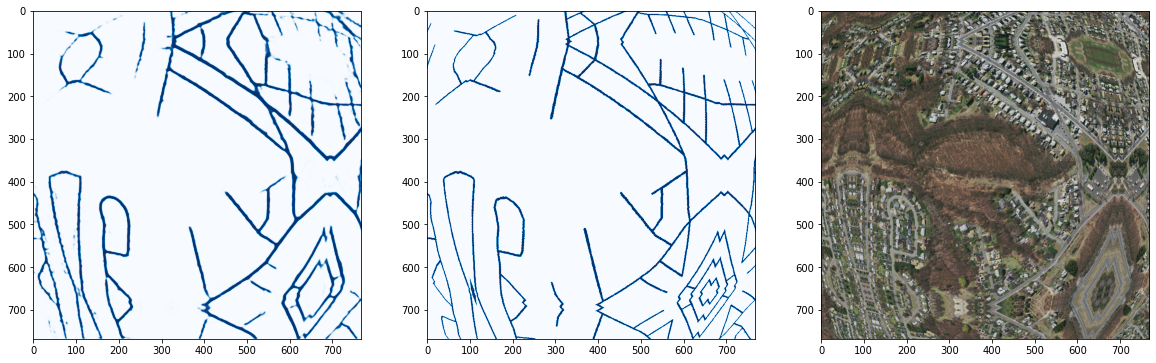

In [ ]:
plot_mask_gt_image(predicted, y_test.squeeze(0).squeeze(-1),\
           Xtest.squeeze(0))

## Overall quality

In [ ]:
#model.predict()

In [ ]:
scores = model.evaluate_generator(test_generator)
metrics=[iou_score]
print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value))  

RuntimeError: ignored

## Adding TTA (test time augmentation)

In [ ]:
from tta_wrapper import tta_segmentation
from keras.models import load_model
#model = load_model('./weights/road_crop.efficientnetb0imgsize.h5', 
#                   custom_objects={'binary_crossentropy + jaccard_loss': bce_jaccard_loss,
#                                   'iou_score': iou_score})
#tta_model = tta_segmentation(model, h_flip=True, merge='mean').compile(optimizer = Adam(), loss=bce_jaccard_loss, metrics=[iou_score])
tta_model = model
scores = tta_model.evaluate_generator(test_generator)
metrics=[iou_score]
print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value)) 

### By adjusting threshold you can further improve your score

In [ ]:
def draw_get_best_threshold(ious, thresholds):
    """
    Returns threshold_best, iou_best
    """
    threshold_best_index = np.argmax(ious) 
    iou_best = ious[threshold_best_index]
    threshold_best = thresholds[threshold_best_index]

    plt.plot(thresholds, ious)
    plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
    plt.xlabel("Threshold")
    plt.ylabel("IoU")
    plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
    plt.legend()
    return threshold_best, iou_best

preds = []
y_val = []
for i in (range(0,test_generator.__len__())):
    Xtest, y_test  = test_generator.__getitem__(i)
    #preds.append(model.predict(Xtest).reshape(1472, 1472))
    preds.append(model.predict(Xtest).reshape(768, 768))
   
    
    #preds.append(tta_model.predict(Xtest).reshape(1472, 1472))
    y_val.append(y_test)
preds = np.stack(preds, axis=0)
y_val = np.stack(y_val, axis=0)

thresholds = list(np.linspace(0.1, 0.9, 10))
ious = np.array([iou_metric_batch(y_val, np.int32(preds > threshold)) for threshold in (thresholds)])

best_threshold, best_iou = draw_get_best_threshold(ious, thresholds)

# Applying the trained model to Madagascar data

In [ ]:
def read_madagascar_image(image_name):
  this_batch_size = 1
  X = np.empty((this_batch_size, train_generator.image_size, train_generator.image_size, 3), dtype=np.float32)
  X_sample =  (imread(image_name)/255).astype("float32")
  augmented = Resize(height=(X_sample.shape[0]//32)*32, width=(X_sample.shape[1]//32)*32)(image = X_sample, mask = None)
  X_sample = augmented['image']

  return X_sample.reshape(1, X_sample.shape[0], X_sample.shape[1], 3).astype(np.float32)

Xm = read_madagascar_image("madagascar.tif")


In [ ]:
test_generator.image_size

768

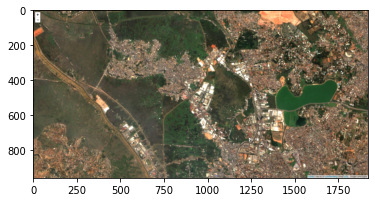

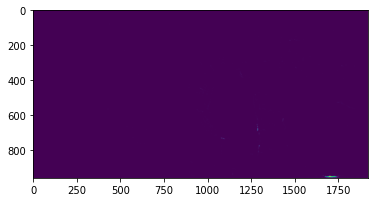

(960, 1920, 3)


In [ ]:
ym = model.predict(Xm)
for i in range(0,1):
  plt.imshow(Xm[i])     
  plt.show()
  plt.imshow(ym[i, :,:,0])
  plt.show() 
  print(Xm[i].shape)

a


/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:175: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Emboss instead", FutureWarning)


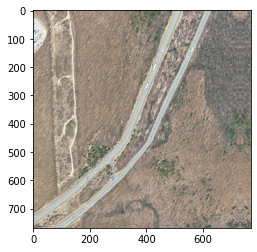

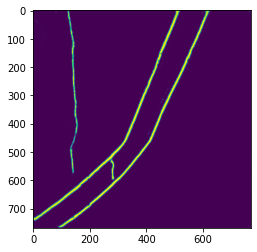

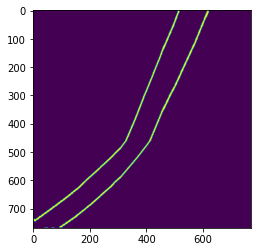

In [ ]:
#comparing with (predicted) training data
Xtest2, ytest2  = test_generator.__getitem__(2)
ypred2 = model.predict(Xtest2)
plt.imshow(Xtest2[0])
plt.show()
plt.imshow(ypred2[0, :,:,0])     
plt.show()
plt.imshow(ytest2[0, :,:,0])
plt.show() 

a


/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:175: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Emboss instead", FutureWarning)


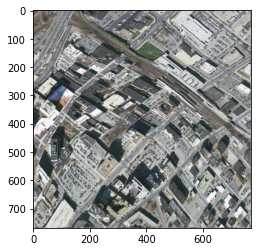

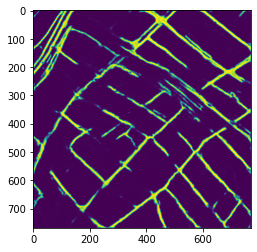

a


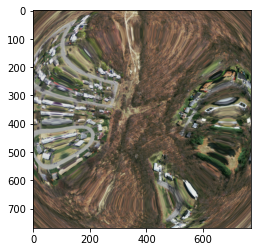

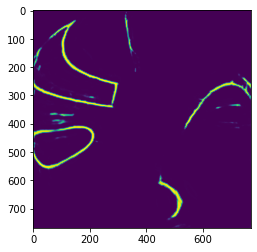

a


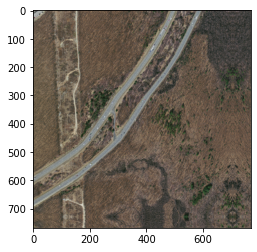

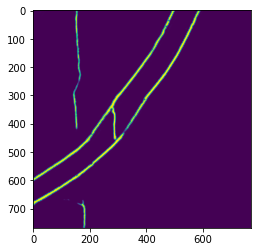

a


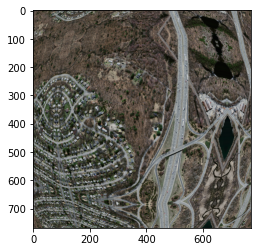

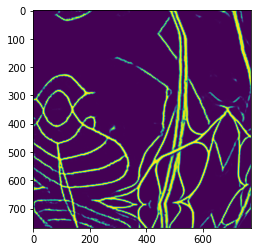

a


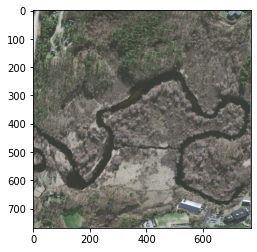

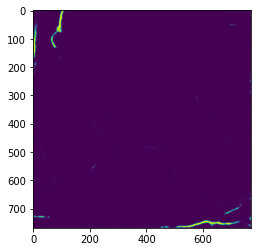

a


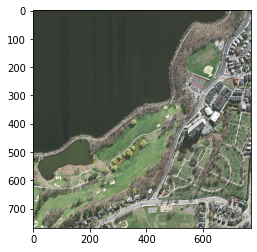

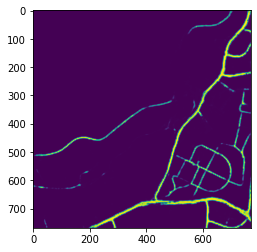

a


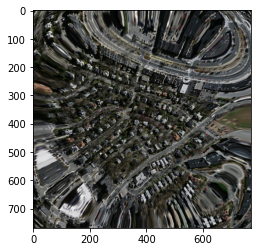

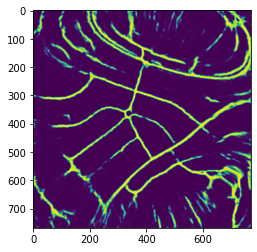

a


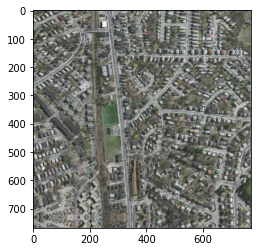

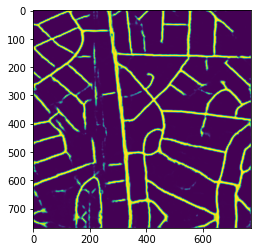

In [ ]:
#more training data:
for i in range(0,8):
  Xtest2, ytest2  = test_generator.__getitem__(i)
  ypred2 = model.predict(Xtest2)
  plt.imshow(Xtest2[0])     
  plt.show()
  plt.imshow(ypred2[0, :,:,0])
  plt.show() 
 

# Tweaking the Madagascar image  

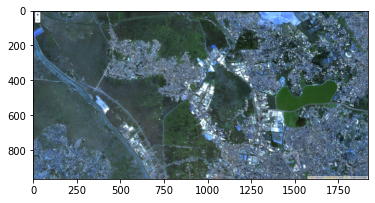

In [ ]:
import cv2
# read an image
img = cv2.imread("madagascar.tif")
# display the image in the console
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
img.shape

(965, 1920, 3)

In [ ]:
cv2.resize(img, (1500, 1500)).shape

(1500, 1500, 3)

In [ ]:
Xtest2[0].shape

(768, 768, 3)

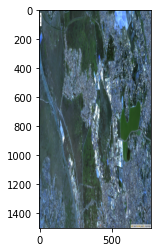

In [ ]:
plt.imshow(cv2.resize(img, (768, 1500)))

In [ ]:
#generator for reading multiple new (esp. Madagascar) images
madagascar_test_generator = DataGeneratorFolder(root_dir = './road_segmentation/rv_madagascar',#'./data/road_segmentation_ideal/training',
                                     image_folder = 'input/', 
                                     mask_folder = 'output/',
                                     batch_size = 1,
                                     nb_y_features = 1, 
                                     #augmentation = aug_with_crop
                                     )

In [ ]:
madagascar_test_generator.image_filenames

['madagascar.tif', 'a31emden.png', 'antananarivoclose.png']

In [ ]:
x, y = madagascar_test_generator.__getitem__(0)

In [ ]:
x.shape

(1, 960, 1920, 3)

In [ ]:
#link to image:
#https://www.google.com/maps/place/Antananarivo,+Madagascar/@-18.887626,47.4949945,3630m/data=!3m1!1e3!4m5!3m4!1s0x21f07de34f1f4eb3:0xdf110608bcc082f9!8m2!3d-18.8791902!4d47.5079055!5m1!1e4

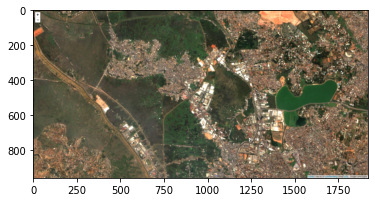

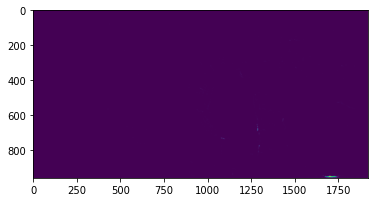

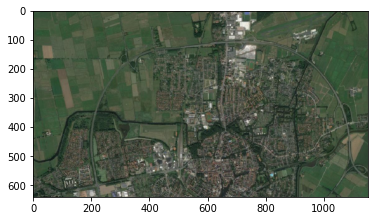

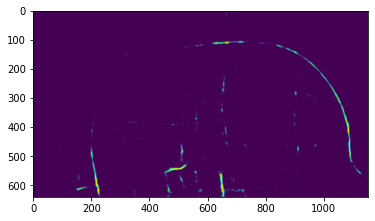

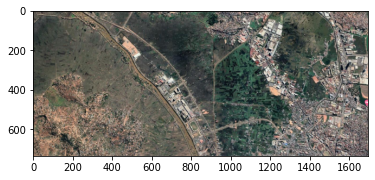

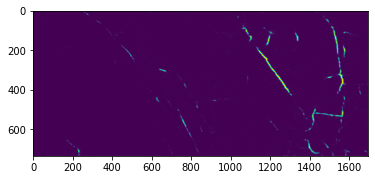

In [ ]:
for i in range(0,len(madagascar_test_generator.image_filenames)):
  Xtest2, ytest2  = madagascar_test_generator.__getitem__(i)
  ypred2 = model.predict(Xtest2)
  plt.imshow(Xtest2[0])     
  plt.show()
  plt.imshow(ypred2[0, :,:,0])
  plt.show() 
 